<a href="https://colab.research.google.com/github/RayanBatada/autograd-from-scratch/blob/main/Autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

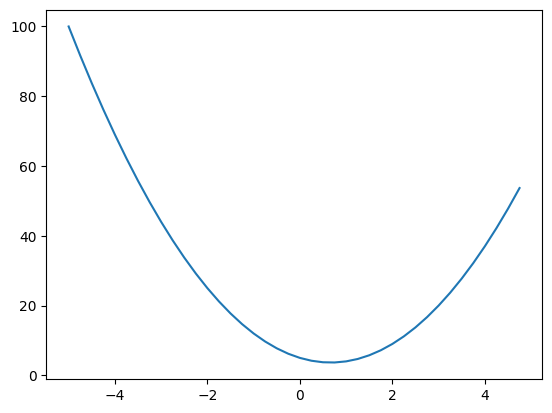

In [ ]:
def f(x):
  #3x^2 - 4x + 5
  return 3*x**2 - 4*x + 5

xs = np.arange(-5, 5, 0.25) # -4.75, -4.5, -4.25, -4...4.75 STOP HERE
ys = f(xs)
ys
plt.plot(xs, ys)



In [ ]:
# limit h --> 0        (( f(x+h)+f(x)) / h)

h = 0.001
x = 3.0
print ( f(x) )
print( f(x+h) )

functionResponseAmount = f(x+h) - f(x)
numericalApproximationOfSlope = functionResponseAmount/h
print(numericalApproximationOfSlope)

print( "function response amount = ", functionResponseAmount )
print( "numerical approximation of slope = ", numericalApproximationOfSlope)

20.0
20.014003000000002
14.00300000000243
function response amount =  0.01400300000000243
numerical approximation of slope =  14.00300000000243


In [ ]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c

h = 0.0001

# Partial Derivative: How the output changes with respect to ONE input while the others remain constant

a = 2
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print("------")
print("(a) d1", d1)
print("(a) d2", d2)
print("(a) d1", (d2-d1)/h)

print(d)

------
(a) d1 4.0
(a) d2 3.999699999999999
(a) d1 -3.000000000010772
4.0


In [ ]:

class Value:
  def __init__(self, data, _children=(), _op="", label=""):
    self.data = data

    self.grad = 0

    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data}, grad={self.grad}, label={self.label})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    return Value(self.data + other.data, (self, other), "+")

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    return Value(self.data * other.data, (self, other), "*")



a = Value(2, label="a")
b = Value(3, label="b")
c = Value(10, label="c")

print(a)
print(a+c)
print(a*b)

d = a + b
print(d)
print(d._prev, d._op)

Value(data=2, grad=0, label=a)
Value(data=12, grad=0, label=)
Value(data=6, grad=0, label=)
Value(data=5, grad=0, label=)
{Value(data=3, grad=0, label=b), Value(data=2, grad=0, label=a)} +


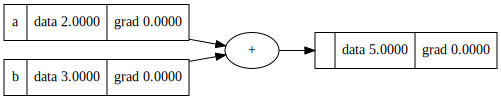

In [ ]:
# Now, since expressions will get much larger, want way to nicely visualize the expressions we're building
# Using this "graphviz" functionality from Digraph module to visualize
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

draw_dot(d)

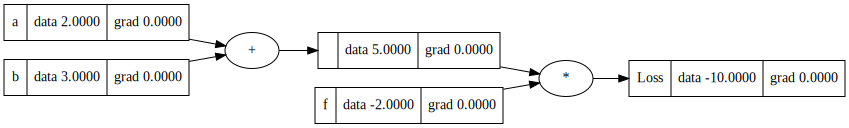

In [ ]:
f = Value( -2.0, label="f" )
L = d*f; L.label = "Loss"

draw_dot(L)

Value(data=-8.0, grad=0, label=L)


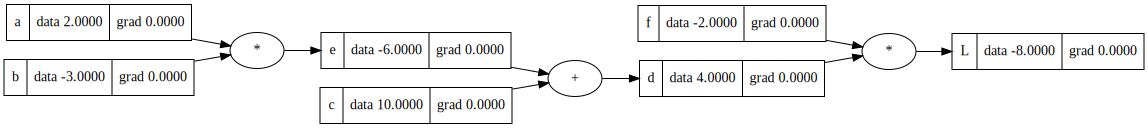

In [ ]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a*b; e.label = "e"
d = e + c; d.label = "d"
f = Value(-2.0, label="f")
L = d * f; L.label = "L"

print(L)
draw_dot(L)

In [ ]:
def NumericalDerivativeOfL():
  h = 0.001

  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L1 = L.data

  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  f += h
  L = d * f; L.label = "L"
  L2 = L.data


  print((L2-L1)/h)


NumericalDerivativeOfL()




3.9999999999995595


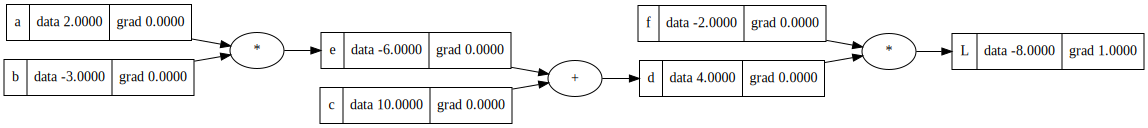

In [ ]:
L.grad = 1.0 # dL/dL = 1.0
draw_dot( L )



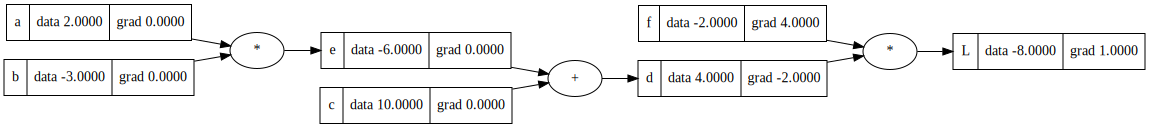

In [ ]:
# dL/dd = f (derivative of d is f)
# dL/df = d (derivative of f is d)

d.grad = -2.0
f.grad = 4.0

draw_dot(L)

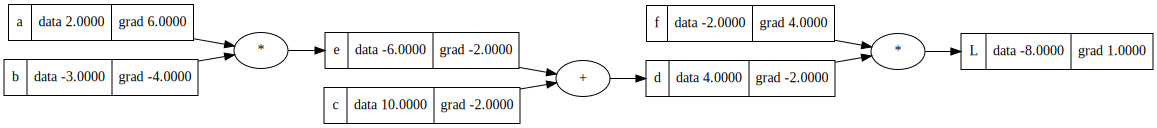

In [ ]:
# dd/de = 1
# dd/dc = 1
# d = e + c -> 1

# Know "Local Derivative" of "+" Node

# e = b
# L = ((a*b)+c) * f
# L = (a*c + b*c) * f
#
# da/de * de/dd * dd/dL = f
# b * f
# -3 * -2 = 6.0

c.grad = 1.0 * -2.0 # derivative (dc/dL) is just f
e.grad = 1.0 * -2.0 # derivative (de/dL) if just f

b.grad = 2.0 * -2.0 # derivative (da/dL) is just f
a.grad = -3.0 * -2.0 # derivative (db/dL) is just f

draw_dot(L)


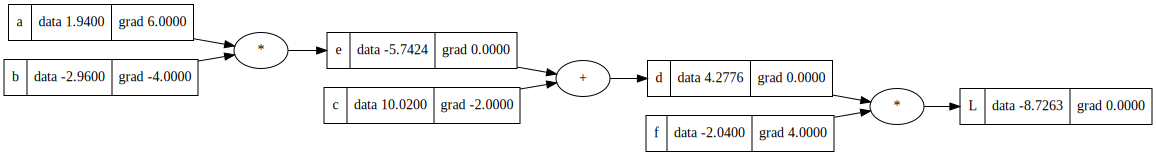

In [ ]:
LR = -0.01
a.data += LR * a.grad
b.data += LR * b.grad
c.data += LR * c.grad
f.data += LR * f.grad

e = a*b; e.label = "e"
d = e + c; d.label = "d"
L = d * f; L.label = "L"

draw_dot(L)

In [ ]:

class Value:
  def __init__(self, data, _children=(), _op="", label=""):
    self.data = data

    self.grad = 0
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self._backward = lambda: None

  def __repr__(self):
    return f"Value(data={self.data}, grad={self.grad}, label={self.label})"

  def __radd__(self, other):
    return self + other
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), "+")

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __rmul__(self,other):
    return self * other

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), "*")

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
    out = Value(t, (self, ), "tanh")

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), "exp")

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward

    return out

  def __rsub__(self, other):
    return self + (-other) # adding the negative number
  def __sub__(self, other):
    return self + (-other) # adding the negative number
  def __neg__(self):
    return self * -1


  def __rtruediv__(self, other):
    return self / other
  def __truediv__(self, other):
    return self * other ** -1


  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self, ), f"**{other}")

    def _backward():
      self.grad += (other * self.data**(other-1)) * out.grad
    out._backward = _backward

    return out


  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited: # if current vertex is not in visited
        visited.add(v)
        for child in v._prev: # for all previous values (keeps track through ._prev)
          build_topo(child)
        topo.append(v) # appends the current element
    build_topo(self)
    self.grad = 1.0

    for node in reversed(topo):
      node._backward()




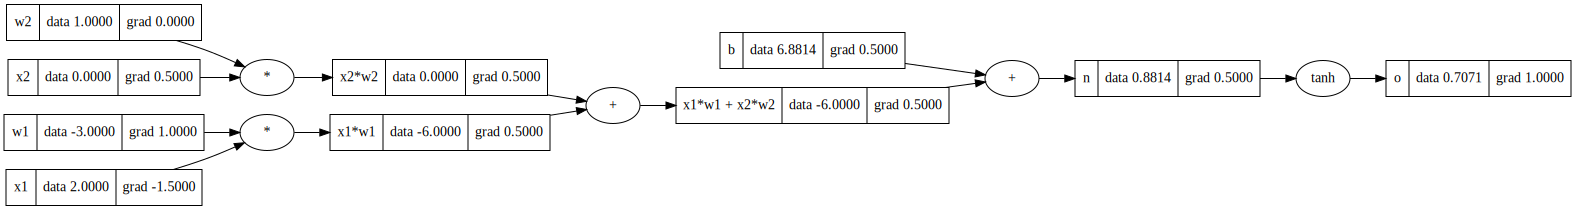

In [ ]:
# x1*w1 + x2*w2 + b


# Inputs
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# Weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# Bias
b = Value(6.8813735870195432, label="b")

# Weighted Sum... x1*w1 + x2*w2 + b (sum of weights & bias)
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"

n = x1w1x2w2 + b; n.label = "n" # Neuron's Weighted Sum (aka x1x2w2b)
o = n.tanh(); o.label = "o" # Activation (Tanh) Function

o.backward()
draw_dot(o)


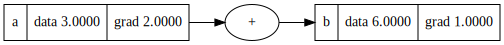

In [ ]:
a = Value(3.0, label="a")
b = a + a; b.label = "b"

b.backward()

draw_dot(b)

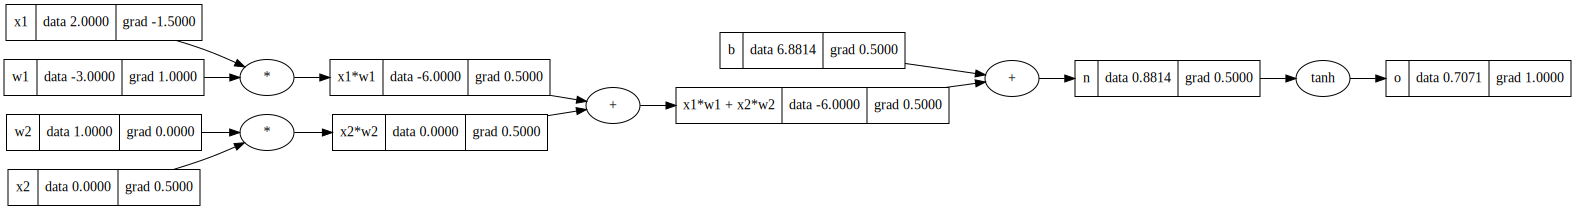

In [ ]:
# x1*w1 + x2*w2 + b


# Inputs
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# Weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# Bias
b = Value(6.8813735870195432, label="b")

# Weighted Sum... x1*w1 + x2*w2 + b (sum of weights & bias)
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"

n = x1w1x2w2 + b; n.label = "n" # Neuron's Weighted Sum (aka x1x2w2b)
o = n.tanh(); o.label = "o" # Activation (Tanh) Function

o.backward()
draw_dot(o)


In [ ]:
import torch

# Inputs
x1 = torch.Tensor([2.0]).double();           x1.requires_grad = True
x2 = torch.Tensor([0.0]).double();           x2.requires_grad = True

# Weights
w1 = torch.Tensor([-3.0]).double();          w1.requires_grad = True
w2 = torch.Tensor([1.0]).double();           w2.requires_grad = True

# Bias
b = torch.Tensor([6.8813735870195432]).double();           b.requires_grad = True

x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"

n = x1*w1 + x2*w2 + b
o = torch.tanh(n);


print(o.data.item())

o.backward()

print("x2", x2.grad.item())
print("w2", w2.grad.item())
print("x1", x1.grad.item())
print("w1", w1.grad.item())

0.7071066904050358
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


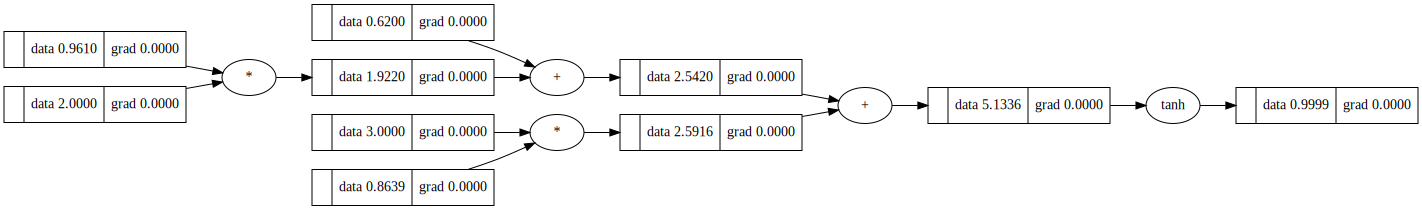

In [ ]:
import random

class Neuron:
  def __init__(self, input_count):
    self.weights = [Value(random.uniform(-1,1)) for _ in range(input_count)]
    self.bias = Value(random.uniform(-1,1))

  def __call__(self, x):
    # W * x + b --> w*x is a Dot Product --> w1*x1 + w2*x2 + ... + b

    # zip (self.w, x) --> takes two iterators and creates new iterator that iterates over tuples of the corresponding entries (makes a tuple out of each input and weight pair)
    # sum( w1*x1 for w1,x1 in zip(self.w, x), b )
    raw_activation = sum( (wi*xi for wi,xi in zip(self.weights, x)), self.bias )
    out = raw_activation.tanh()

    return out

  def parameters(self):
    return self.weights + [self.bias]




x = [2.0, 3.0, -1.0]
n = Neuron(2)
n(x)
draw_dot(n(x))




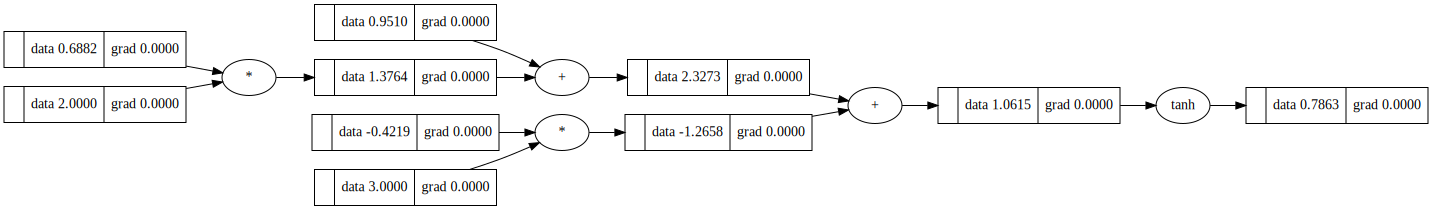

In [ ]:
class Layer:

  def __init__(self, input_count, output_count):
    self.neurons = [Neuron(input_count) for _ in range(output_count)]



  def __call__(self, x):
    outs =  [ n(x) for n in self.neurons ]

    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [ p for neuron in self.neurons for p in neuron.parameters()]



x = [2.0, 3.0]
l = Layer(2,3) # 2 inputs and 3 outputs
l(x)
draw_dot(l(x)[0])



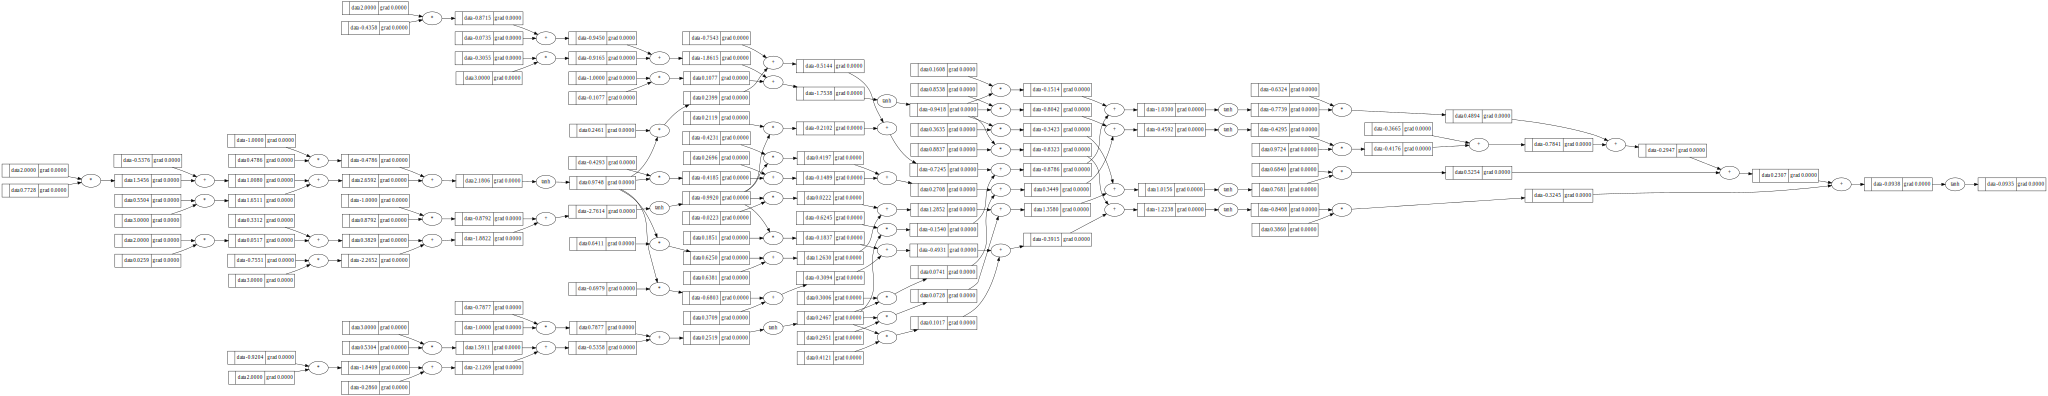

In [ ]:
class MLP:

  def __init__(self, input_count, layer_sizes):
    sizes = [input_count] + layer_sizes # = [3, 4, 4, 1]

    self.layers = [Layer(sizes[i], sizes[i+1]) for i in range(len(layer_sizes))] # number of neurons in each layer

  def __call__(self, x): #
    for layer in self.layers:
      x = layer(x)

    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters() ]


x = [2.0, 3.0, -1.0]
n = MLP(3, [4,4,1])
draw_dot(n(x))

In [ ]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]

ypred = [n(x) for x in xs]
ypred

[Value(data=-0.09351190720388915, grad=0, label=),
 Value(data=-0.8613053392901014, grad=0, label=),
 Value(data=-0.7235082406316922, grad=0, label=),
 Value(data=0.3457040427206362, grad=0, label=)]

In [ ]:
len (n.parameters())

41

In [ ]:
# mse = [(ypred[i] - ys[i])**2 for i in range(len(ys))] --> Mean Squared Error # For each of our examples, taking the prediction, subtracting the expectation and then squaring them

# zip(ys, ypred) --> (y_expected, y_predicted)

mse = [(yp - y)**2 for y, yp in zip(ys, ypred)]
mse

loss = sum(mse)
print(loss)

Value(data=1.7195553928168226, grad=0, label=)


In [ ]:
loss.backward()

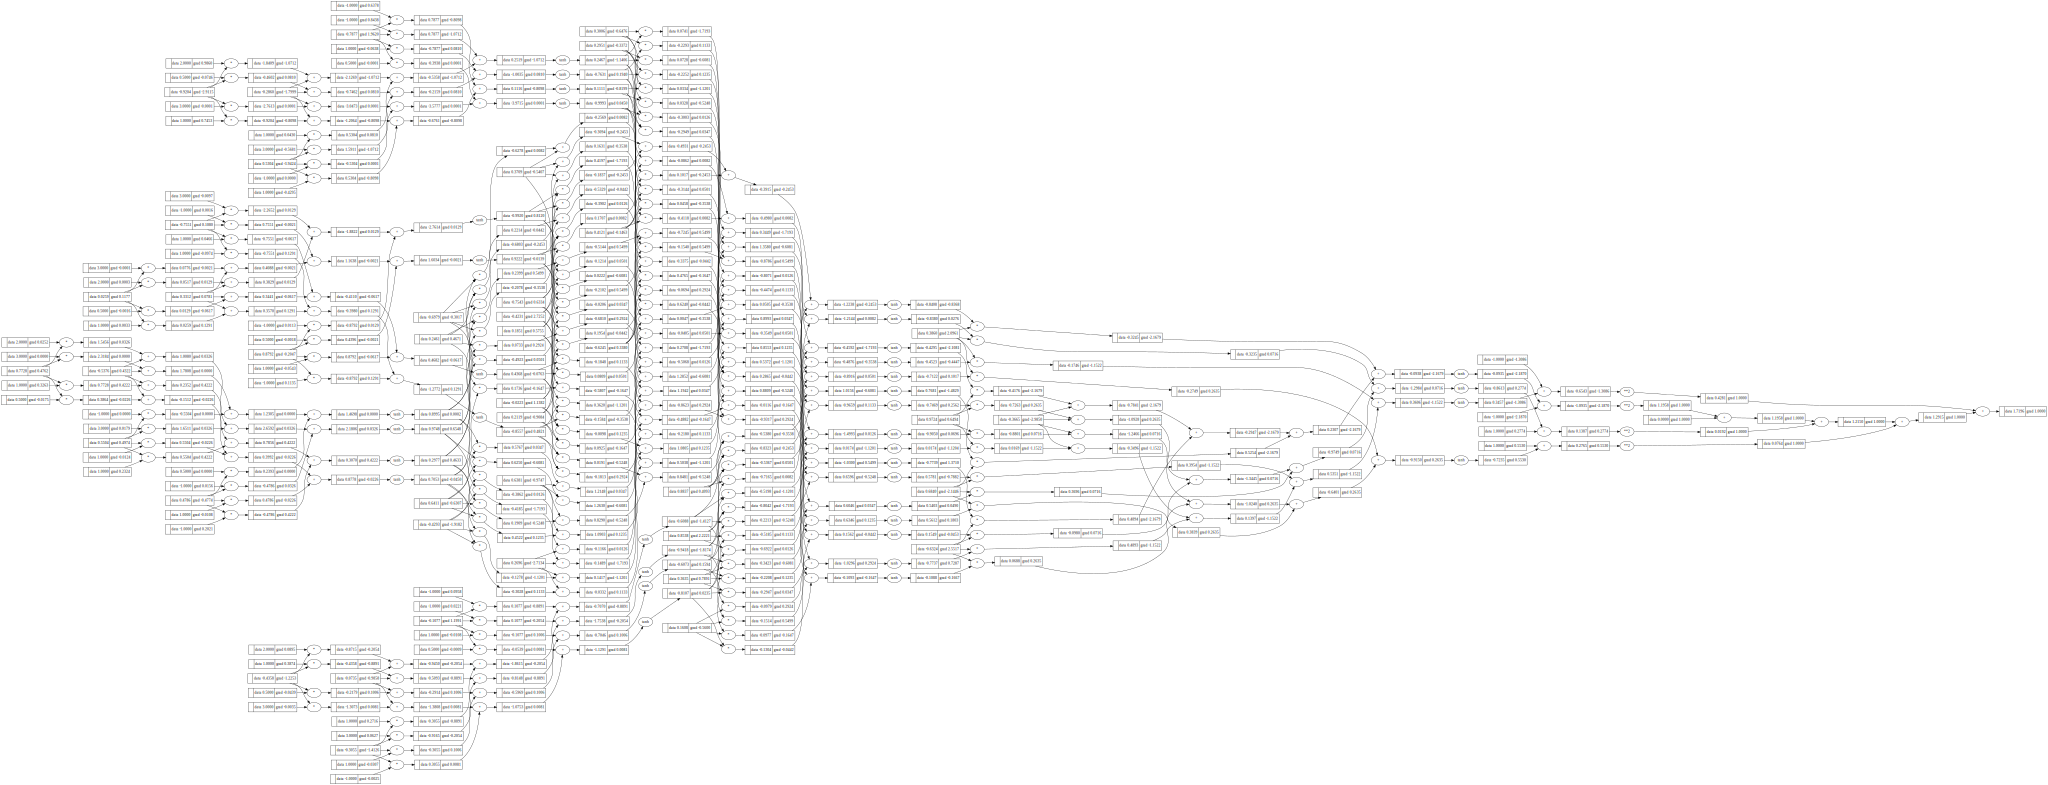

In [ ]:
n.layers[0].neurons[0].weights[0].grad

# Gradient is positive on this neuron so we go the opposite direction (we decrease the weights)

draw_dot(loss)



In [ ]:
n.parameters()

[Value(data=0.7727961732269266, grad=0.47622297946281256, label=),
 Value(data=0.5503717138521809, grad=0.4973565978917631, label=),
 Value(data=0.478586733925636, grad=-0.4774016449810598, label=),
 Value(data=-0.5375573282185317, grad=0.4322491537343844, label=),
 Value(data=0.02587252763033776, grad=0.11766571218780078, label=),
 Value(data=-0.755051568874054, grad=0.10800858315271833, label=),
 Value(data=0.8791797532526906, grad=-0.2047121994979753, label=),
 Value(data=0.3311620583938024, grad=0.07809355199199976, label=),
 Value(data=-0.9204362549838627, grad=-2.9114737836923705, label=),
 Value(data=0.5303573855759249, grad=-3.9424219590007743, label=),
 Value(data=-0.7876756359112673, grad=1.9620353441747278, label=),
 Value(data=-0.2860015042731381, grad=-1.7998785255029128, label=),
 Value(data=-0.4357500510318346, grad=-1.2253150819357268, label=),
 Value(data=-0.30549862942616524, grad=-1.4126225355926405, label=),
 Value(data=-0.1077310254238546, grad=1.1991260210468395, 

In [ ]:
# DATASET

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]

In [ ]:
# FORWARD PASS

ypred = [n(x) for x in xs]
ypred

[Value(data=-0.09351190720388915, grad=0, label=),
 Value(data=-0.8613053392901014, grad=0, label=),
 Value(data=-0.7235082406316922, grad=0, label=),
 Value(data=0.3457040427206362, grad=0, label=)]

In [ ]:
# CALCULATE LOSS

mse = [(yp - y)**2 for y, yp in zip(ys, ypred)]
mse

loss = sum(mse)

In [ ]:
# BACKWARD PASS (get the Gradients)
for p in n.parameters():
  p.grad = 0.0
loss.backward()

In [ ]:
# UPDATING PARAMETERS (weights + bias) --> Updating the parameters slightly... according to the Gradient info and Learning Rate adjustment

lr = 0.01 # Learning Rate
for p in n.parameters():
  p.data += -lr * p.grad # '-'  because opposite direction of gradient. Update parameter by multiplying learning rate with the gradient with -1.

In [ ]:
print( loss )

Value(data=1.7195553928168226, grad=1.0, label=)


In [ ]:
ypred

[Value(data=-0.09351190720388915, grad=-2.1870238144077785, label=),
 Value(data=-0.8613053392901014, grad=0.2773893214197971, label=),
 Value(data=-0.7235082406316922, grad=0.5529835187366157, label=),
 Value(data=0.3457040427206362, grad=-1.3085919145587277, label=)]

In [ ]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]

In [ ]:
# CHECKPOINT - ACTUAL TRAINING LOOPS

for k in range(20):
  # FORWARD PASS
  ypred = [n(x) for x in xs]

  # CALCULATING LOSS
  mse = [(yp - y)**2 for y, yp in zip(ys, ypred)]
  loss = sum(mse)

  # BACKWARD PROPOGATION
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()

  # UPDATING PARAMETERS (weights + bias)
  lr = 0.01 # Learning Rate
  for p in n.parameters():
    p.data += -lr * p.grad

  print(f"Iteration {k}: {loss.data}")

ypred


Iteration 0: 0.9722278337385246
Iteration 1: 0.6848444790547957
Iteration 2: 0.5515129738226738
Iteration 3: 0.47405992244461875
Iteration 4: 0.42123287872206144
Iteration 5: 0.3812714428403801
Iteration 6: 0.3490380390399645
Iteration 7: 0.3219871755857406
Iteration 8: 0.2987105700535774
Iteration 9: 0.27834942950981767
Iteration 10: 0.2603344837331169
Iteration 11: 0.2442617598933387
Iteration 12: 0.22982893872049434
Iteration 13: 0.2168005388002479
Iteration 14: 0.2049876357526401
Iteration 15: 0.19423531977447317
Iteration 16: 0.18441449598423715
Iteration 17: 0.17541625072706604
Iteration 18: 0.16714781151879235
Iteration 19: 0.15952954462524865


[Value(data=0.760685079043868, grad=-0.4786298419122641, label=),
 Value(data=-0.8953675299861047, grad=0.2092649400277906, label=),
 Value(data=-0.7230316118403751, grad=0.5539367763192498, label=),
 Value(data=0.879175865771529, grad=-0.2416482684569421, label=)]

In [ ]:

class Module:
  def zero_grad(self):
    for p in self.parameters():
      p.grad = 0.0






class Neuron(Module):
  def __init__(self, input_count):
    self.weights = [Value(random.uniform(-1,1)) for _ in range(input_count)]
    self.bias = Value(random.uniform(-1,1))

  def __call__(self, x):
    raw_activation = sum( (wi*xi for wi,xi in zip(self.weights, x)), self.bias )
    out = raw_activation.tanh()

    return out

  def parameters(self):
    return self.weights + [self.bias]



class Layer(Module):

  def __init__(self, input_count, output_count):
    self.neurons = [Neuron(input_count) for _ in range(output_count)]



  def __call__(self, x):
    outs =  [ n(x) for n in self.neurons ]

    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [ p for neuron in self.neurons for p in neuron.parameters()]


class MLP(Module):

  def __init__(self, input_count, layer_sizes):
    sizes = [input_count] + layer_sizes # = [3, 4, 4, 1]

    self.layers = [Layer(sizes[i], sizes[i+1]) for i in range(len(layer_sizes))]

  def __call__(self, x): #
    for layer in self.layers:
      x = layer(x)

    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters() ]

In [ ]:
# DATASET

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]

n = MLP(3, [4, 4, 1])

In [ ]:
# TRAINING LOOPS

for k in range(20):
  # FORWARD PASS
  ypred = [n(x) for x in xs]

  # CALCULATING LOSS
  mse = [(yp - y)**2 for y, yp in zip(ys, ypred)]
  loss = sum(mse)

  # BACKWARD PROPOGATION
  n.zero_grad()
  loss.backward()

  # UPDATING PARAMETERS (weights + bias)
  lr = 0.01 # Learning Rate
  for p in n.parameters():
    p.data += -lr * p.grad

  print(f"Iteration {k}: {loss.data}")

ypred


What are Neural Networks?
  - Mathematical Expressions (can be quite simple or quite complex)
  - that take in input as data and input as the weights/parameters of the Neural Net
  - Loss function tries to measure the accuracy of the predictions (low = closer matching predictions to our targets)

- Mathematical Expression for the Forward Pass, followed by a loss function, back propogation to calculate the gradient, then we do parameter updates (change the weight & bias)
- ... iterate on this multiple times --> known as "Gradient Descent"

Differences between this and GPTs:
- (Stochastic Gradient Descent) -- GPT does something a bit more sophisticated
- MSE: find the difference between the actual and the expected and then square it (smaller is better)
  - Alternatives include Cross-Entropy Loss


Other details that we didn't cover here for Neural Networks:
 - BATCHING
 - LOSS (often slightly differently calculated: Max Margin, Binary Cross Entropy, MSE, ... all can be used for Binary Classification and don't make much of a difference in our super simple use case)
 - REGULARIZATION (regularizing the input off of a formula)
 - LEARNING RATE & DECAY

